<a href="https://colab.research.google.com/github/NetoScientist/DataSience/blob/main/Estudando_SeaBorn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudando a base de dados vendas games
Fonte do dataset : https://www.kaggle.com/gregorut/videogamesales

## Estudando o dataset

### Importando as bibliotecas

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("darkgrid")


### Importando o data set 

In [3]:
data = pd.read_csv('vgsales.csv')

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Verificando se existe valores nulo  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
data.isnull().sum() #Econtramos valores null nas colunas Year e Publisher

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
data.shape #tamanho antes da limpeza de dados 

(16598, 11)

In [8]:
#Limpando os null
data.dropna(how="any", inplace=True)

In [9]:
data.isnull().sum() #Não existe mais registro nulos

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
data.shape #Verificamos que antes da limpeza era (16598, 11)

(16291, 11)

### Convertendo a coluna Year (Ano) de float64 para int64

In [12]:
data.Year.head()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: Year, dtype: float64

In [13]:
data.Year = data.Year.astype(int)

In [14]:
data.Year.head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: Year, dtype: int64

### Conhecendo os dados

In [15]:
print("Data minima", data.Year.min())
print("Data maxima", data.Year.max())
print("Editora", len(data['Publisher'].unique()))
print("Numero de Plataformas", len(data['Platform'].unique()))
print("Numero de Generos", len(data['Genre'].unique()))

Data minima 1980
Data maxima 2020
Editora 576
Numero de Plataformas 31
Numero de Generos 12


In [16]:
data['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

## Fazendo gráficos com SeaBorn

### barplot

In [17]:
# Definido o eixo y
y = data.query('Year < 2017').groupby(['Year']).sum()
y = y['Global_Sales']

#Definindo o eixo x
x = y.index

Text(0.5, 1.0, 'Venda de Games em $ Milhões Por Ano')

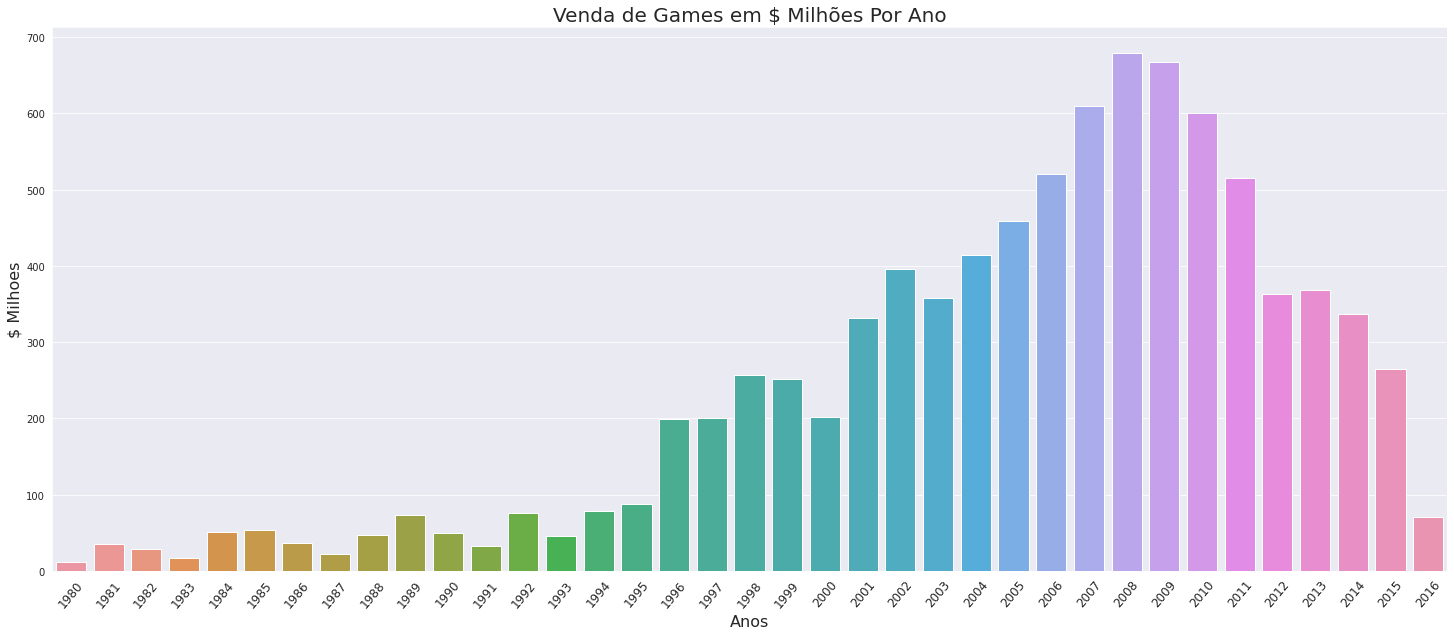

In [18]:
ax = sns.barplot(y = y, x = x)
ax.figure.set_size_inches(25, 10)
ax.set_xlabel(xlabel='Anos', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Milhoes', fontsize=16)
ax.set_title(label='Venda de Games em $ Milhões Por Ano', fontsize=20)

In [19]:
# Definido o eixo y
y = data.query('Year < 2017').groupby(['Year']).count()
y = y['Global_Sales']

#Definindo o eixo x
x = y.index

Text(0.5, 1.0, 'Lançamento de jogos por ano')

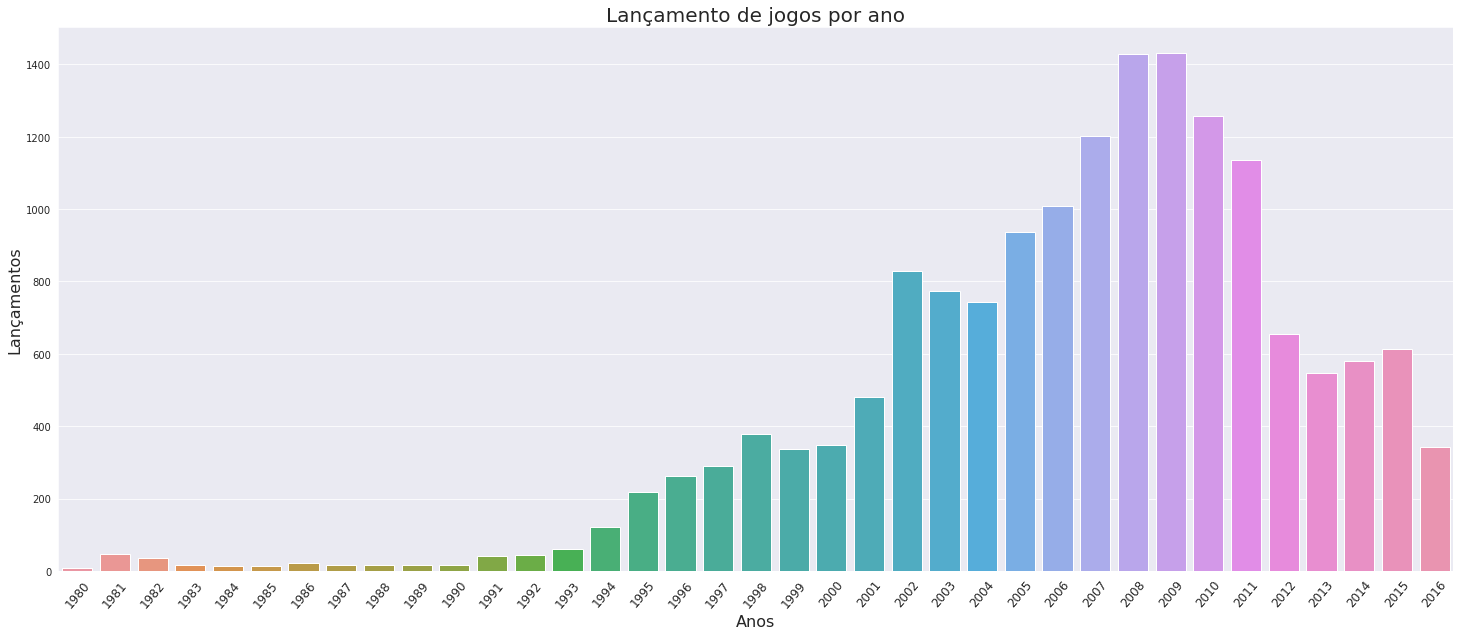

In [20]:
ax = sns.barplot(y = y, x = x)
ax.figure.set_size_inches(25, 10)
ax.set_xlabel(xlabel='Anos', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Lançamentos', fontsize=16)
ax.set_title(label='Lançamento de jogos por ano', fontsize=20)

In [21]:
#Maior venda global por ano
por_ano = data.query('Year < 2017').groupby(by=['Year'])['Global_Sales'].sum()
por_ano = por_ano.reset_index()
por_ano.head()

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36


### Count Plot

In [22]:
#definindo a ordem
ordem =  data['Genre'].value_counts().index
ordem

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'],
      dtype='object')

Text(0.5, 1.0, 'Numeros jogos por genero')

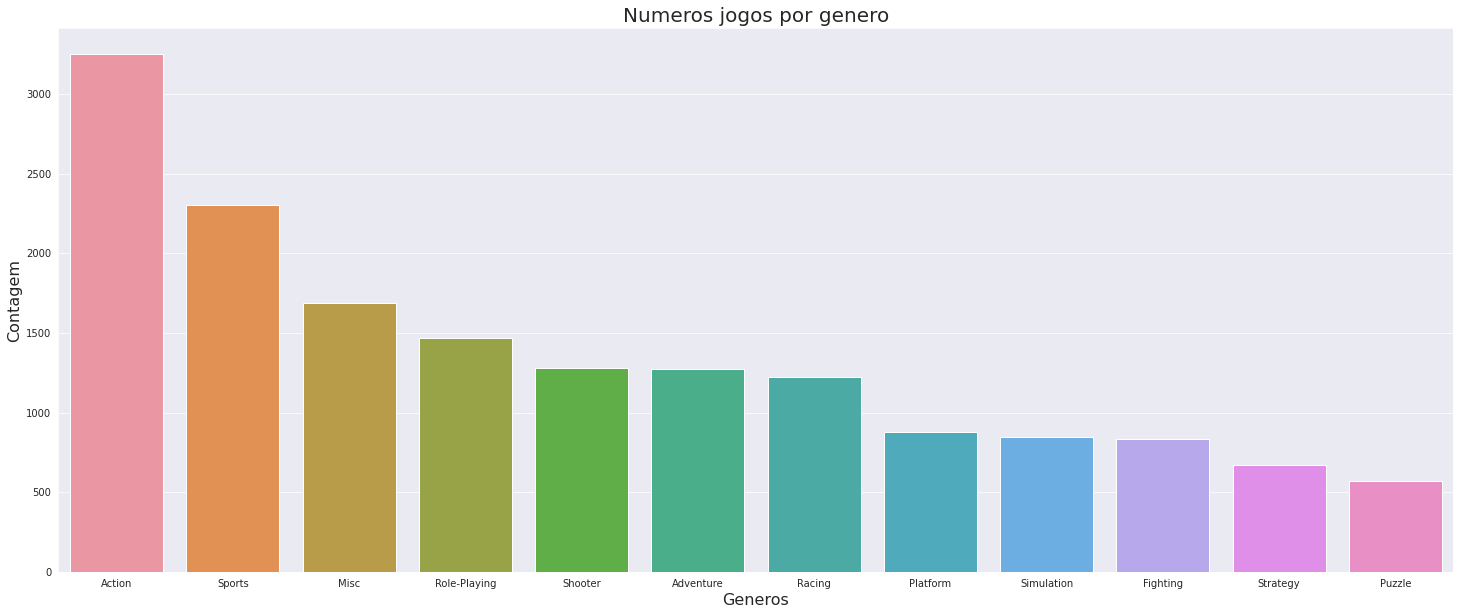

In [23]:
ax = sns.countplot(x = 'Genre', data=data, order=ordem)
ax.figure.set_size_inches(25, 10)
ax.set_xlabel(xlabel='Generos', fontsize=16)
ax.set_ylabel(ylabel='Contagem', fontsize=16)
ax.set_title(label='Numeros jogos por genero', fontsize=20)

In [24]:
#Maior lançameto por ano
ordem = data.query('Year < 2017').groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index
ordem

Int64Index([2009, 2008, 2010, 2007, 2011, 2006, 2005, 2002, 2003, 2004, 2012,
            2015, 2014, 2013, 2001, 1998, 2000, 2016, 1999, 1997, 1996, 1995,
            1994, 1993, 1981, 1992, 1991, 1982, 1986, 1983, 1989, 1987, 1990,
            1988, 1985, 1984, 1980],
           dtype='int64', name='Year')

Text(0.5, 1.0, 'Lançamento de jogos por ano')

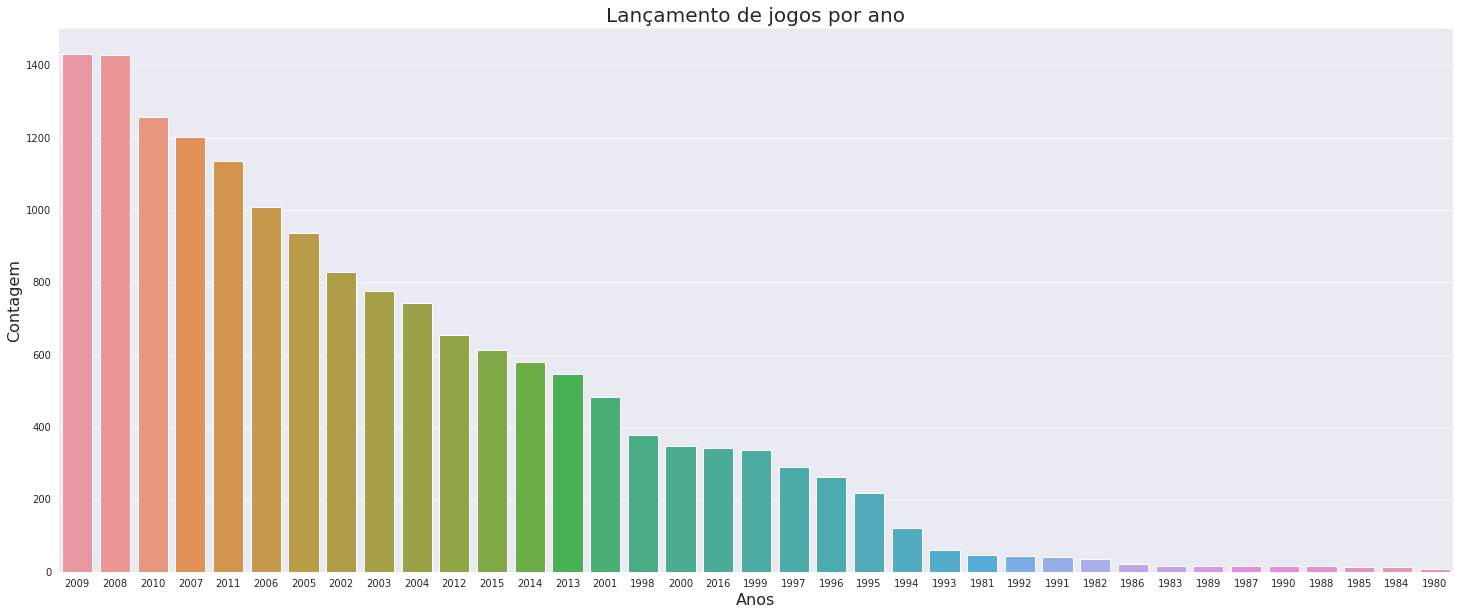

In [25]:
ax = sns.countplot(x = 'Year', data=data, order=ordem)
ax.figure.set_size_inches(25, 10)
ax.set_xlabel(xlabel='Anos', fontsize=16)
ax.set_ylabel(ylabel='Contagem', fontsize=16)
ax.set_title(label='Lançamento de jogos por ano', fontsize=20)

In [26]:
#Top 5 Jogos por ano
ordem = data.query('Year < 2017').Year.value_counts().iloc[:5].index
ordem

Int64Index([2009, 2008, 2010, 2007, 2011], dtype='int64')

Text(0.5, 1.0, 'Lançamento de jogos por ano')

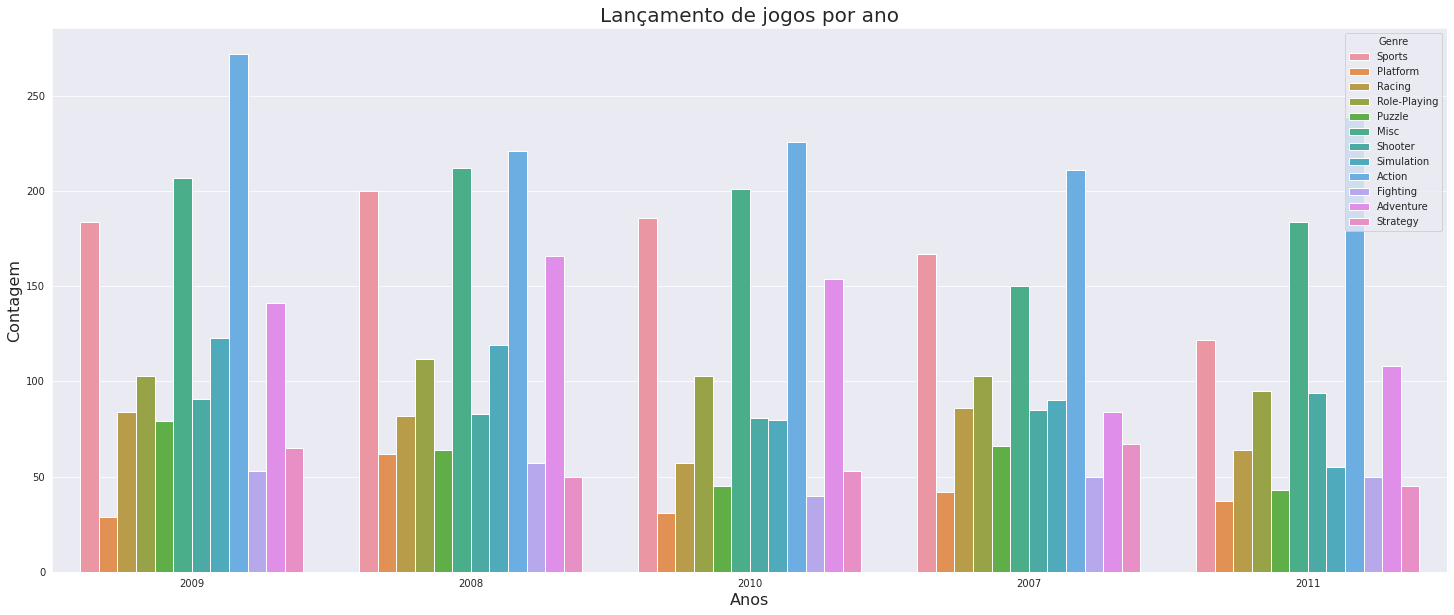

In [27]:
ax = sns.countplot(x = 'Year', hue='Genre', data=data, order=ordem)
ax.figure.set_size_inches(25, 10)
ax.set_xlabel(xlabel='Anos', fontsize=16)
ax.set_ylabel(ylabel='Contagem', fontsize=16)
ax.set_title(label='Lançamento de jogos por ano', fontsize=20)

In [31]:
#Qual Genero vendeu mais em unico ano
ano_maximo_df = data.query('Year < 2017').groupby(['Year', 'Genre']).size().reset_index(name='count')
ano_maximo_df.head()

,Year,Genre,count
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1980,Sports,1


In [34]:
ano_maximo_idx = ano_maximo_df.groupby(['Year'])['count'].transform(max) == ano_maximo_df['count']
ano_maximo_idx

0      False
1      False
2       True
3      False
4      False
       ...  
381    False
382    False
383    False
384    False
385    False
Name: count, Length: 386, dtype: bool

In [36]:
ano_maximo_genero = ano_maximo_df[ano_maximo_idx].reset_index(drop=True)
ano_maximo_genero.head()

,Year,Genre,count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3


In [38]:
ano_maximo_genero = ano_maximo_genero.drop_duplicates(subset=['Year', 'count'], keep='last').reset_index(drop=True)
ano_maximo_genero.head()

,Year,Genre,count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Shooter,3


In [39]:
genero = ano_maximo_genero['Genre'].values
genero

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action'], dtype=object)

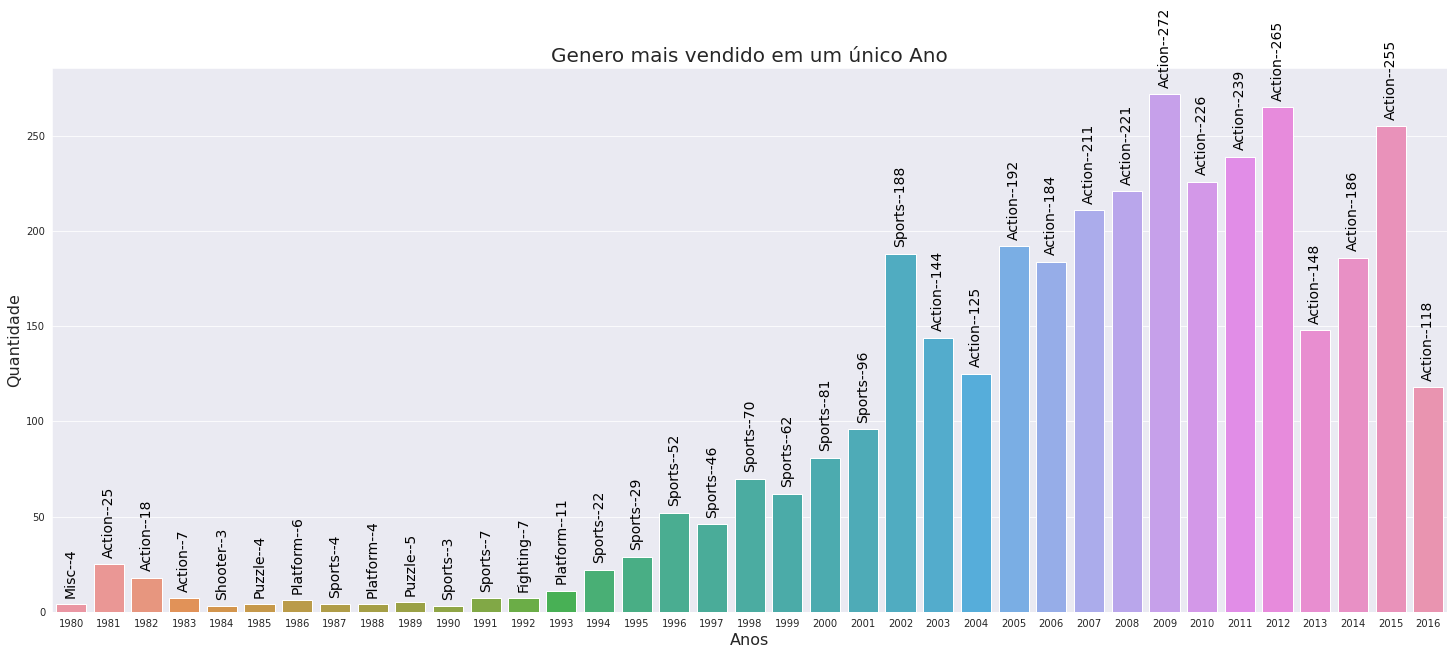

In [44]:
ax = sns.barplot(x='Year', y='count', data=ano_maximo_genero)
ax.figure.set_size_inches(25, 10)
ax.set_title(label='Genero mais vendido em um único Ano', fontsize=20)
ax.set_xlabel(xlabel='Anos', fontsize=16)
ax.set_ylabel(ylabel='Quantidade', fontsize=16)
index = 0
for value in ano_maximo_genero['count'].values:
  ax.text(index, value + 5, str(genero[index] + "--"+ str(value)), color='#000', size=14, rotation=90, ha="center")
  index += 1 

In [46]:
# Genero mais caro
genero_df = data.query('Year < 2017').groupby(['Genre'])['Global_Sales'].sum()
genero_df = genero_df.reset_index()
genero_df = genero_df.sort_values(by=['Global_Sales'], ascending=False)
genero_df.head()

,Genre,Global_Sales
0,Action,1722.83
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.79
4,Platform,829.13


Text(0, 0.5, 'Venda Global')

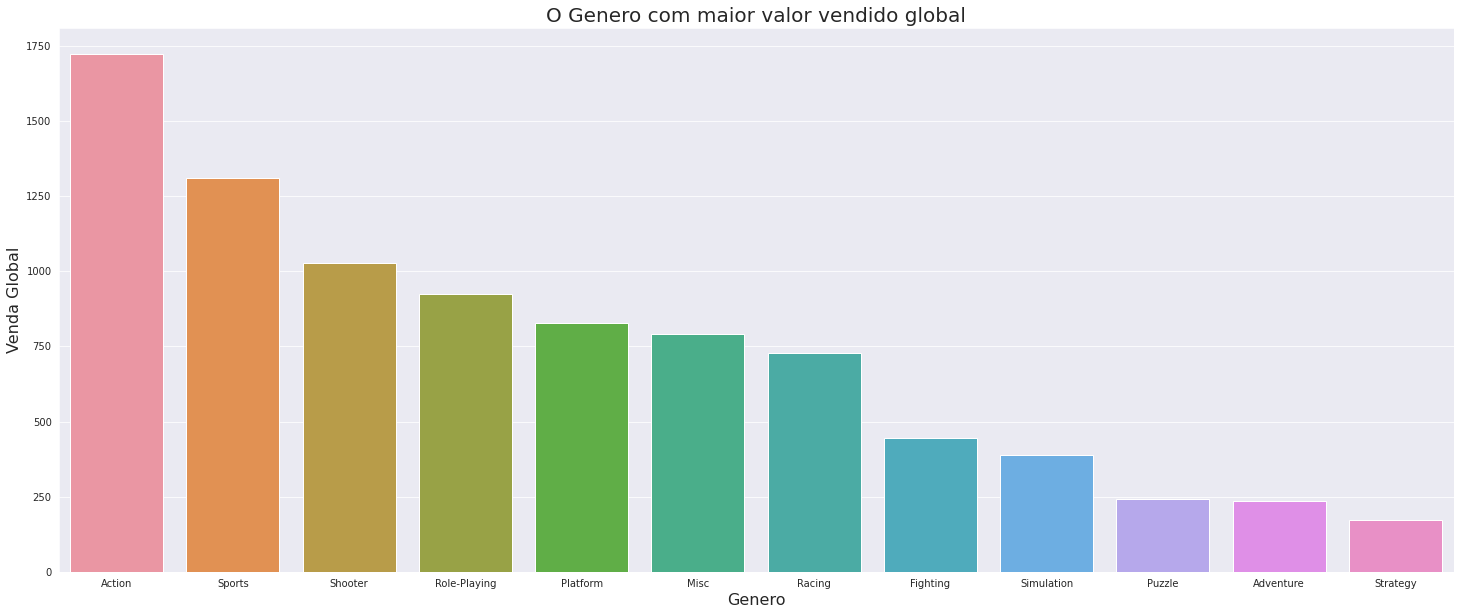

In [48]:
ax = sns.barplot(x='Genre', y='Global_Sales', data=genero_df)
ax.figure.set_size_inches(25, 10)
ax.set_title(label='O Genero com maior valor vendido global', fontsize=20)
ax.set_xlabel(xlabel='Genero', fontsize=16)
ax.set_ylabel(ylabel='Venda Global', fontsize=16)

In [68]:
#Receita por Região
top_venda_reg = data.query('Year < 2017')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_venda_reg = top_venda_reg.sum().reset_index()
top_venda_reg = top_venda_reg.rename(columns={'index':'region', 0 : 'sale'})
top_venda_reg

,region,sale
0,NA_Sales,4327.38
1,EU_Sales,2406.69
2,JP_Sales,1284.22
3,Other_Sales,788.89


Text(0, 0.5, '$ Milhoes')

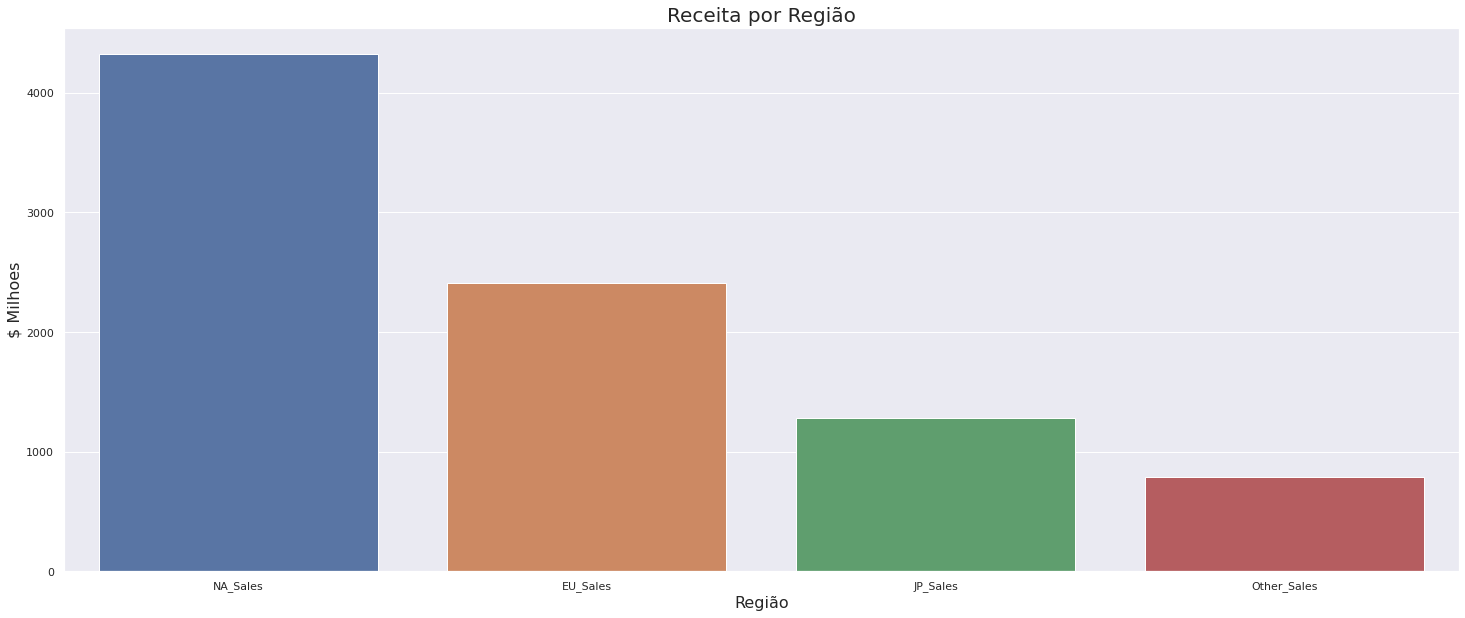

In [70]:
ax = sns.barplot(x='region', y='sale', data=top_venda_reg)
ax.figure.set_size_inches(25, 10)
ax.set_title(label='Receita por Região', fontsize=20)
ax.set_xlabel(xlabel='Região', fontsize=16)
ax.set_ylabel(ylabel='$ Milhoes', fontsize=16)

### heatmap

In [51]:
# Comparação de vendas por Genero
comp_genero = data.query('Year < 2017')[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genero.groupby(by=['Genre']).sum()
comp_map.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.64,184.92
Adventure,101.93,63.74,51.99,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,396.92,211.77,106.67,73.92
Platform,445.99,200.65,130.65,51.51


Text(30.5, 0.5, 'Genero')

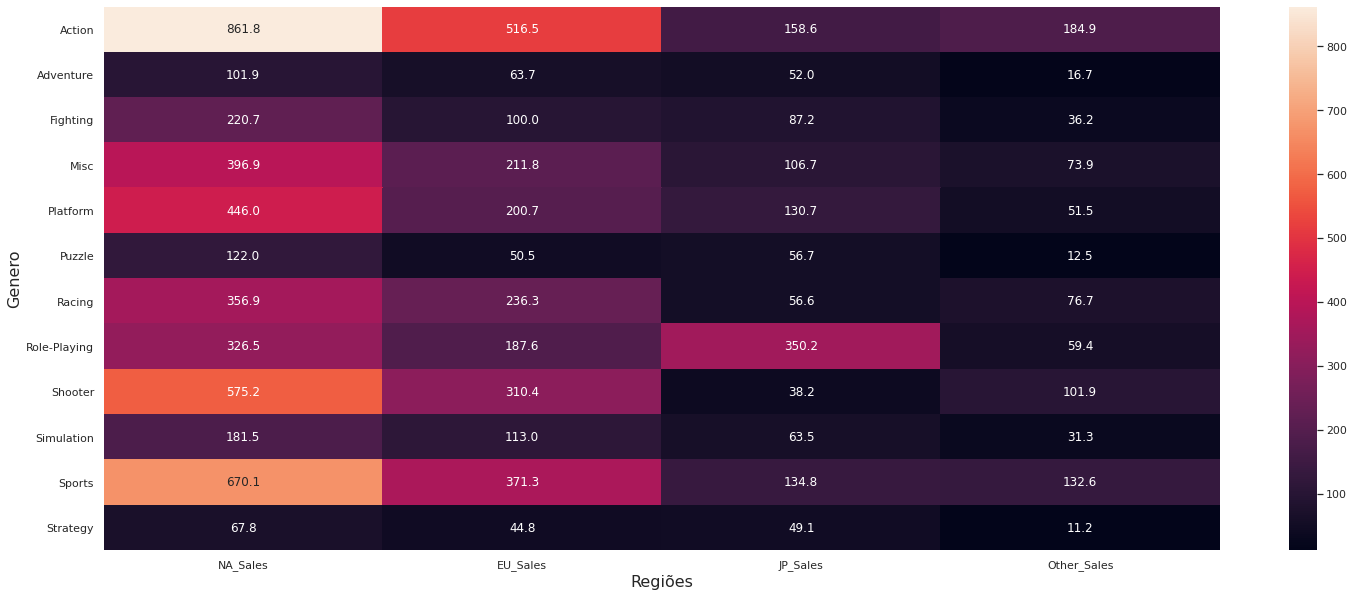

In [59]:
sns.set(font_scale=1)
ax = sns.heatmap(comp_map, annot=True, fmt= '.1f')
ax.figure.set_size_inches(25, 10)
ax.set_xlabel(xlabel='Regiões', fontsize=16)
ax.set_ylabel(ylabel='Genero', fontsize=16)

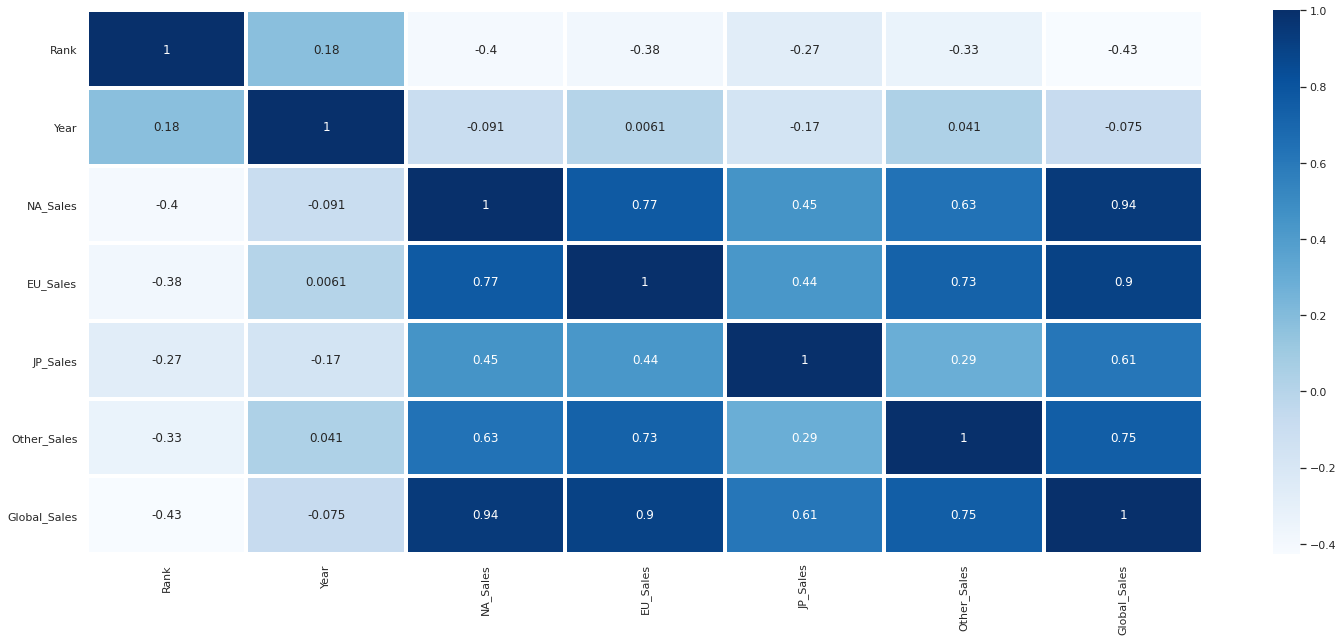

In [72]:
ax = sns.heatmap(data.corr(), cmap='Blues', annot=True, linewidths=3)
ax.figure.set_size_inches(25, 10)

### PairPlot

In [75]:
data_pair = data.query('Year < 2017').loc[:, ['Year', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'Other_Sales']]
data_pair.head()

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00


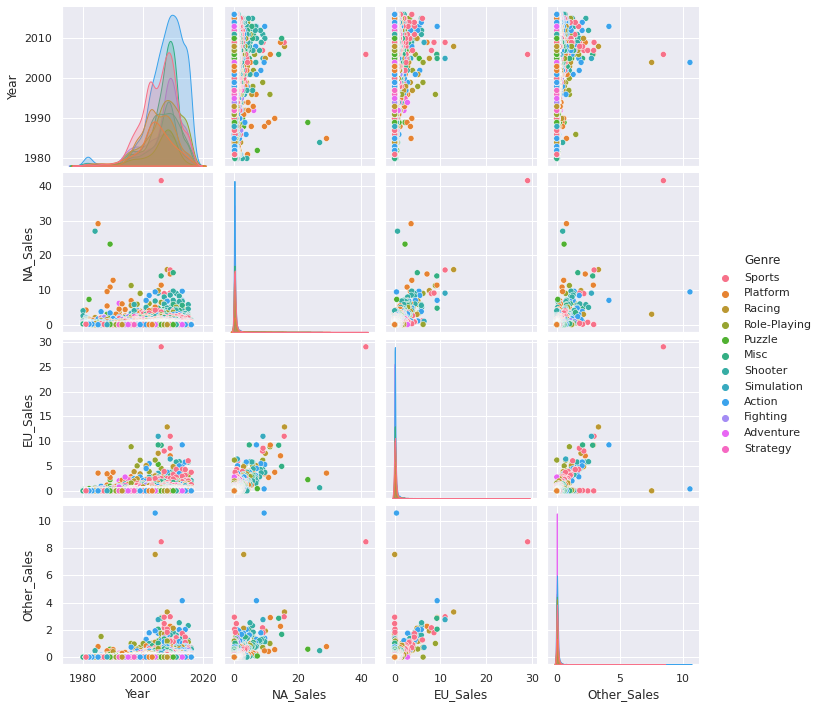

In [78]:
ax = sns.pairplot(data_pair, hue='Genre')

In [79]:
data_pair_log = data_pair.copy()

In [80]:
coluna_venda = ['NA_Sales', 'EU_Sales', 'Other_Sales']

In [83]:
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
14092,2016,PS4,Adventure,0.01,0.02,0.01
14183,2014,PS3,Racing,0.02,0.01,0.01
14185,2011,PC,Puzzle,0.01,0.02,0.01
14267,2007,PC,Puzzle,0.01,0.02,0.01


In [84]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,3.725452,3.367985,2.135349
1,1985,NES,Platform,3.370051,1.275363,-0.261365
2,2008,Wii,Racing,2.763170,2.555676,1.196948
3,2009,Wii,Sports,2.756840,2.398804,1.085189
4,1996,GB,Role-Playing,2.422144,2.184927,0.000000
...,...,...,...,...,...,...
14092,2016,PS4,Adventure,-4.605170,-3.912023,-4.605170
14183,2014,PS3,Racing,-3.912023,-4.605170,-4.605170
14185,2011,PC,Puzzle,-4.605170,-3.912023,-4.605170
14267,2007,PC,Puzzle,-4.605170,-3.912023,-4.605170


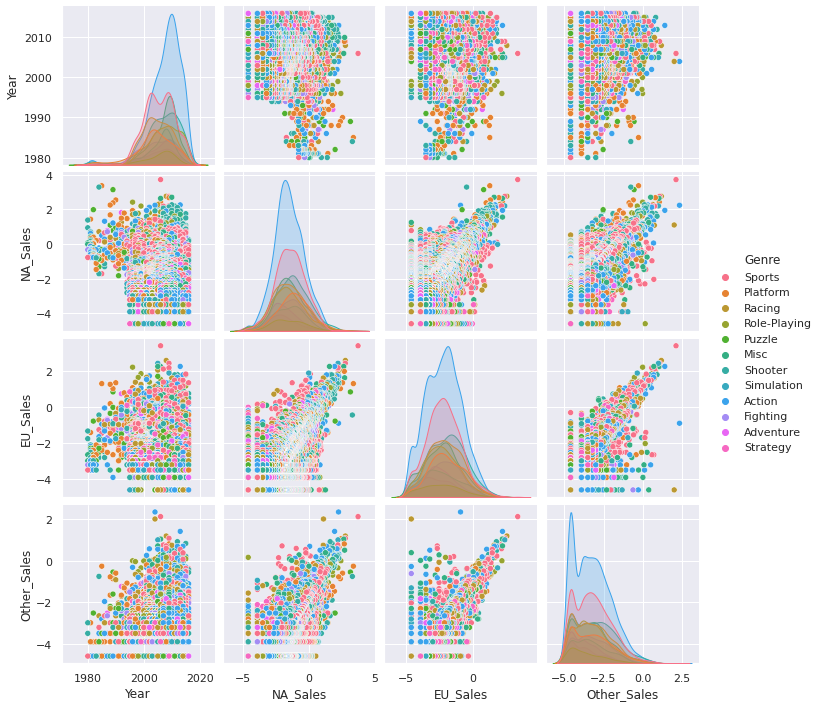

In [88]:
ax = sns.pairplot(data_pair_log, hue='Genre', palette="husl")